In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("fire-data.csv")
df.shape

/var/folders/bt/jnhv97x567d_zw77p84pr9v40000gn/T/ipykernel_6571/508064096.py:1: DtypeWarning: Columns (12,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fire-data.csv")


(130722, 46)

In [10]:
df.head()

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,* CAL FIRE Unit,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06


## Exploratory Data Analysis

### Basic Statistics

### Data Cleaning

drop "Inaccessible" Damage Type.

In [11]:
df = df[df['* Damage'] != "Inaccessible"]
df

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,* CAL FIRE Unit,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,...,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130717,131865,Destroyed (>50%),15105.0,Bestor,Boulevard,Blding A,Pacific Palisades,CA,90272.0,LAC,...,NaN,4422013014.0,143091.0,1952.0,"15105 BESTOR BLVD, PACIFIC PALISADES, CA 90272",6e8009de-5c72-4c9b-b698-487104f9dbbb,34.051455,-118.524687,-1.319411e+07,4.035713e+06
130718,131866,Destroyed (>50%),15105.0,Bestor,Boulevard,Blding B,Pacific Palisades,CA,90272.0,LAC,...,NaN,4422013014.0,143091.0,1952.0,"15105 BESTOR BLVD, PACIFIC PALISADES, CA 90272",e804ec29-706f-4469-8835-4ec6e74b2da9,34.051482,-118.524543,-1.319409e+07,4.035717e+06
130719,131867,Destroyed (>50%),15313.0,Earlham,Street,Blding A,Pacific Palisades,CA,90272.0,LAC,...,NaN,4412019025.0,647421.0,1946.0,"15313 EARLHAM ST, PACIFIC PALISADES, CA 90272",5265aeb2-f751-470e-8d11-aab062c10720,34.038110,-118.527477,-1.319442e+07,4.033920e+06
130720,131868,Destroyed (>50%),15313.0,Earlham,Street,Blding B,Pacific Palisades,CA,90272.0,LAC,...,NaN,4412019025.0,647421.0,1946.0,"15313 EARLHAM ST, PACIFIC PALISADES, CA 90272",d4b0fea2-2040-43ad-beca-e83a363ca5c5,34.038254,-118.527454,-1.319442e+07,4.033940e+06


In [12]:
df['* Damage'].unique()

array(['No Damage', 'Affected (1-9%)', 'Minor (10-25%)',
       'Destroyed (>50%)', 'Major (26-50%)'], dtype=object)

drop unnecessary columns

In [13]:
df.columns

Index(['OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)',
       'Street Suffix (e.g. apt. 23, blding C)', '* City', 'State', 'Zip Code',
       '* CAL FIRE Unit', 'County', 'Community', 'Battalion',
       '* Incident Name', 'Incident Number (e.g. CAAEU 123456)',
       'Incident Start Date', 'Hazard Type',
       'If Affected 1-9% - Where did fire start?',
       'If Affected 1-9% - What started fire?',
       'Structure Defense Actions Taken', '* Structure Type',
       'Structure Category', '# Units in Structure (if multi unit)',
       '# of Damaged Outbuildings < 120 SQFT',
       '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
       '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Deck/Porch On Grade', '* Deck/Porch Elevated',
       '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Dis

In [14]:
drop_columns = ['Street Suffix (e.g. apt. 23, blding C)', 
                'State', 
                '* Street Number', 
                'Battalion',  
                '* City',
                '* Incident Name', 
                'Incident Number (e.g. CAAEU 123456)',
                'Incident Start Date',
                'If Affected 1-9% - Where did fire start?',
                'If Affected 1-9% - What started fire?',
                'Structure Defense Actions Taken', 
                '* Structure Type',
                '# Units in Structure (if multi unit)',
                '# of Damaged Outbuildings < 120 SQFT',
                '# of Non Damaged Outbuildings < 120 SQFT',
                'Fire Name (Secondary)',
                'APN (parcel)',
                'Zip Code',
                'GLOBALID',
                'Latitude',
                'Longitude',
                'x',
                'y',
                '* Street Type (e.g. road, drive, lane, etc.)',
                'County',
                'OBJECTID',
                '* Street Name',
                '* CAL FIRE Unit',
                'Site Address (parcel)',
                'Community',
                'Hazard Type',
                'Distance - Propane Tank to Structure',
                'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
                '* Deck/Porch On Grade',
                '* Deck/Porch Elevated',
                '* Patio Cover/Carport Attached to Structure',
                'Year Built (parcel)'
                ]

df = df.drop(columns=drop_columns)


In [15]:
df.columns

Index(['* Damage', 'Structure Category', '* Roof Construction', '* Eaves',
       '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Fence Attached to Structure', 'Assessed Improved Value (parcel)'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130246 entries, 0 to 130721
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   * Damage                          130246 non-null  object 
 1   Structure Category                130246 non-null  object 
 2   * Roof Construction               129618 non-null  object 
 3   * Eaves                           129134 non-null  object 
 4   * Vent Screen                     129048 non-null  object 
 5   * Exterior Siding                 129337 non-null  object 
 6   * Window Pane                     129270 non-null  object 
 7   * Fence Attached to Structure     108651 non-null  object 
 8   Assessed Improved Value (parcel)  123500 non-null  float64
dtypes: float64(1), object(8)
memory usage: 9.9+ MB


In [17]:
# Generate basic statistics for numerical columns
numerical_stats = df.describe()
numerical_stats

,Assessed Improved Value (parcel)
count,1.235000e+05
mean,7.409999e+05
std,9.519831e+06
min,0.000000e+00
25%,7.186400e+04
50%,1.650000e+05
75%,3.466590e+05
max,1.220403e+09


In [18]:
# Generate basic statistics for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_stats = df[categorical_columns].describe()
categorical_stats

,* Damage,Structure Category,* Roof Construction,* Eaves,* Vent Screen,* Exterior Siding,* Window Pane,* Fence Attached to Structure
count,130246,130246,129618,129134,129048,129337,129270,108651
unique,5,7,12,7,11,11,8,4
top,Destroyed (>50%),Single Residence,Asphalt,Unknown,Unknown,Stucco Brick Cement,Multi Pane,No Fence
freq,70128,86634,58131,50799,39315,34516,44333,55056


Extract zipcodes from Site Address (parcel)

In [19]:
df.rename(columns=lambda x: x.lstrip('* '), inplace=True)
df.columns

Index(['Damage', 'Structure Category', 'Roof Construction', 'Eaves',
       'Vent Screen', 'Exterior Siding', 'Window Pane',
       'Fence Attached to Structure', 'Assessed Improved Value (parcel)'],
      dtype='object')

Impute Year Build based on Zip Code

In [20]:
# df['Zip Code Extract'] = df['Site Address (parcel)'].apply(
#     lambda x: str(x).strip().split(' ')[-1] if pd.notnull(x) else np.nan
# )

# df['Zip Code Extract']

In [21]:
# def random_impute(group):
#     non_null_values = group.dropna()
#     return group.apply(lambda x: np.random.choice(non_null_values) if pd.isnull(x) and len(non_null_values) > 0 else x)

# # Apply random imputation by ZIP Code
# df['Year Built (parcel)'] = df.groupby('Zip Code Extract')['Year Built (parcel)'].transform(random_impute)

In [22]:
# df['Zip Code Extract'].fillna(df['Zip Code Extract'].mode()[0], inplace=True)

In [23]:
# df['Year Built (parcel)'].isna().sum()

In [24]:
# df['Zip Code Extract'].isna().sum()

We still see 16943 missing values for `Year Built`. This is because there are also 

In [25]:
# df['Year Built (parcel)'] = df.groupby('Zip Code Extract')['Year Built (parcel)'].transform(lambda x: x.fillna(x.median()))


Handle "Unknown" or np.nan or " " values

In [26]:
from sklearn.impute import KNNImputer
import pandas as pd

# Identify categorical columns
categorical_cols = ['Structure Category', 'Roof Construction', 'Eaves',
                    'Vent Screen', 'Exterior Siding', 'Window Pane', 
                    'Fence Attached to Structure']

# Convert categorical columns to numerical encoding using a mapping dictionary
mapping_dict = {}  # Store category-to-number mappings

df.replace({" ": np.nan}, inplace=True)

for col in categorical_cols:
    unique_values = df[col].dropna().unique()  # Get unique non-null values
    mapping_dict[col] = {val: i for i, val in enumerate(unique_values)}  # Map category to number
    df[col] = df[col].map(mapping_dict[col])  # Apply mapping

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df[categorical_cols] = knn_imputer.fit_transform(df[categorical_cols])

# Convert back to original categorical values using the mapping
for col in categorical_cols:
    reverse_mapping = {v: k for k, v in mapping_dict[col].items()}  # Reverse mapping
    df[col] = df[col].round().astype(int).map(reverse_mapping)  # Convert back

# Display the first few rows of the cleaned DataFrame
df.head()


,Damage,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Assessed Improved Value (parcel)
0,No Damage,Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Single Pane,No Fence,510000.0
1,Affected (1-9%),Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Combustible,573052.0
2,No Damage,Single Residence,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,350151.0
3,No Damage,Single Residence,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,134880.0
4,No Damage,Single Residence,Tile,Enclosed,"Mesh Screen > 1/8""""",Wood,Multi Pane,No Fence,346648.0


In [27]:
df.isna().sum()

Damage                                 0
Structure Category                     0
Roof Construction                      0
Eaves                                  0
Vent Screen                            0
Exterior Siding                        0
Window Pane                            0
Fence Attached to Structure            0
Assessed Improved Value (parcel)    6746
dtype: int64

## Properties

### Univariate Analysis

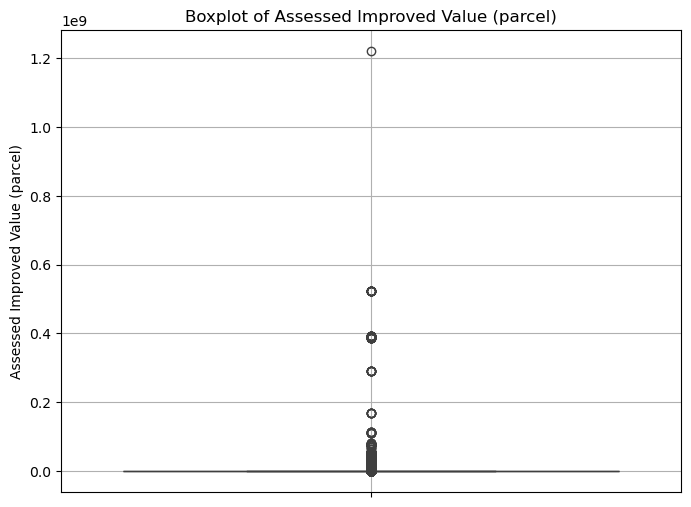

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for "Assessed Improved Value (parcel)"
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Assessed Improved Value (parcel)"])
plt.title("Boxplot of Assessed Improved Value (parcel)")
plt.ylabel("Assessed Improved Value (parcel)")
plt.grid(True)

# Show plot
plt.show()


handle outliers in Assessed Improved Value

In [29]:
lower_bound = df["Assessed Improved Value (parcel)"].quantile(0.05)  # 5th percentile
upper_bound = df["Assessed Improved Value (parcel)"].quantile(0.95)  # 95th percentile

df = df[(df["Assessed Improved Value (parcel)"] >= lower_bound) & 
                (df["Assessed Improved Value (parcel)"] <= upper_bound)]

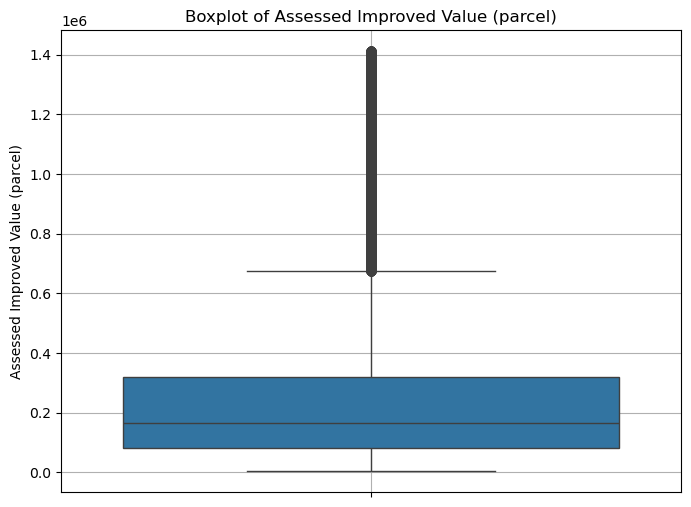

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for "Assessed Improved Value (parcel)"
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["Assessed Improved Value (parcel)"])
plt.title("Boxplot of Assessed Improved Value (parcel)")
plt.ylabel("Assessed Improved Value (parcel)")
plt.grid(True)

# Show plot
plt.show()


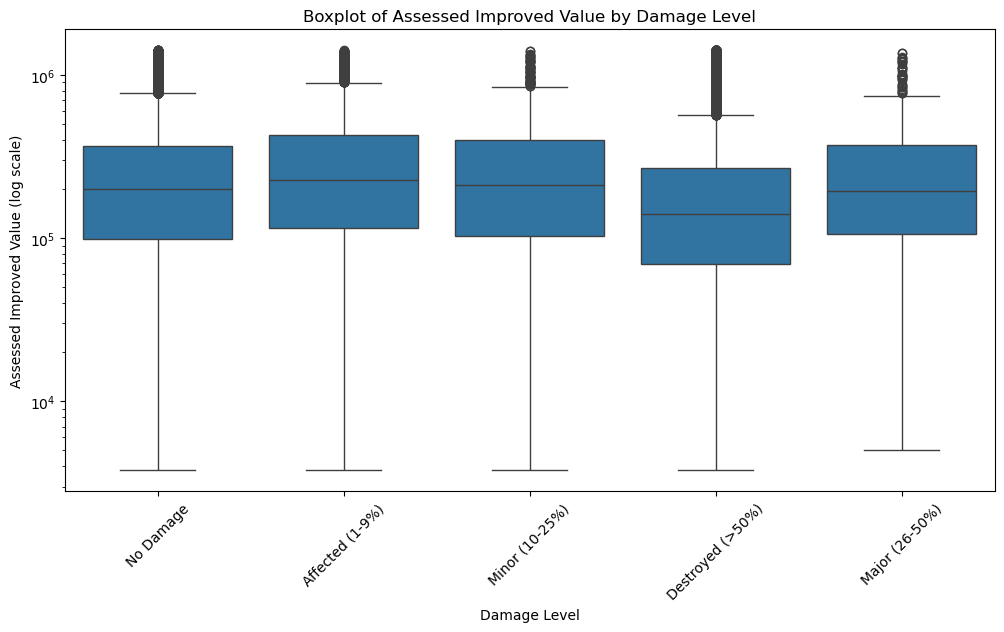

In [31]:
# Create a boxplot to visualize the relationship between '* Damage' and 'Assessed Improved Value (parcel)'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Damage'], y=df['Assessed Improved Value (parcel)'])
plt.yscale('log')  # Log scale to handle skewed property values
plt.xticks(rotation=45)
plt.title('Boxplot of Assessed Improved Value by Damage Level')
plt.xlabel('Damage Level')
plt.ylabel('Assessed Improved Value (log scale)')
plt.show()

In [32]:
df.columns

Index(['Damage', 'Structure Category', 'Roof Construction', 'Eaves',
       'Vent Screen', 'Exterior Siding', 'Window Pane',
       'Fence Attached to Structure', 'Assessed Improved Value (parcel)'],
      dtype='object')

In [33]:
df['Roof Construction'].unique()

array(['Asphalt', 'Tile', 'Unknown', 'Metal', 'Concrete', 'Other', 'Wood',
       'Combustible', 'Fire Resistant', 'No Deck/Porch',
       'Non Combustible'], dtype=object)

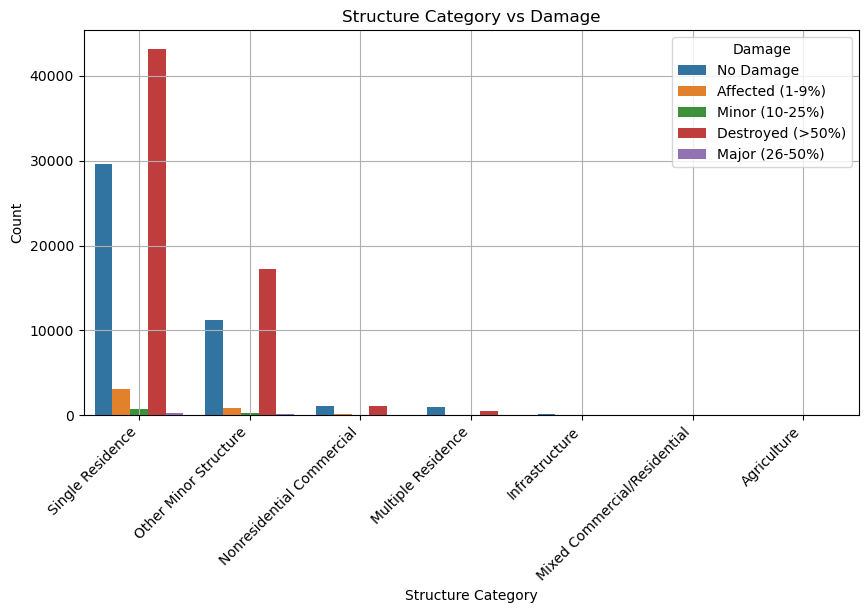

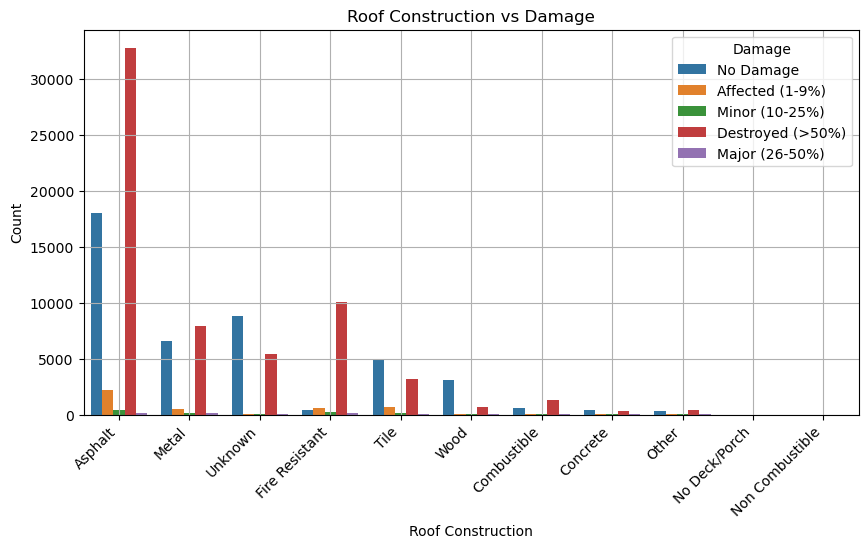

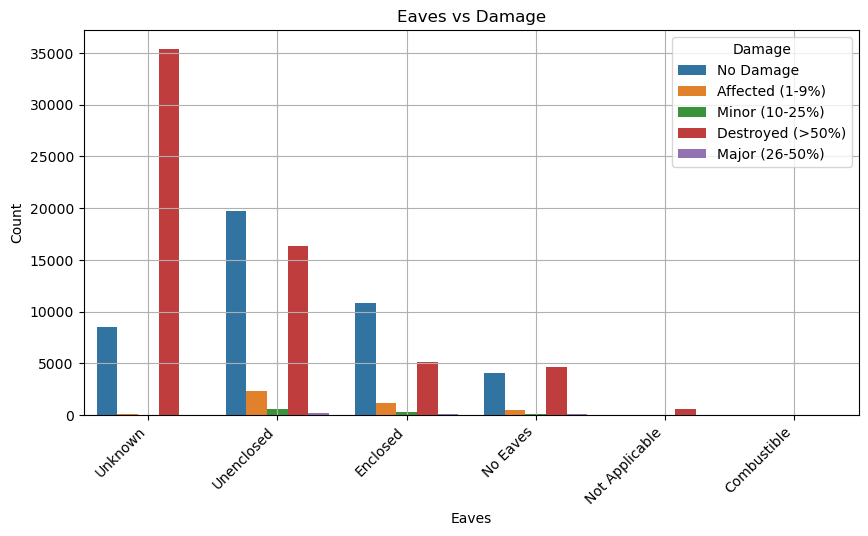

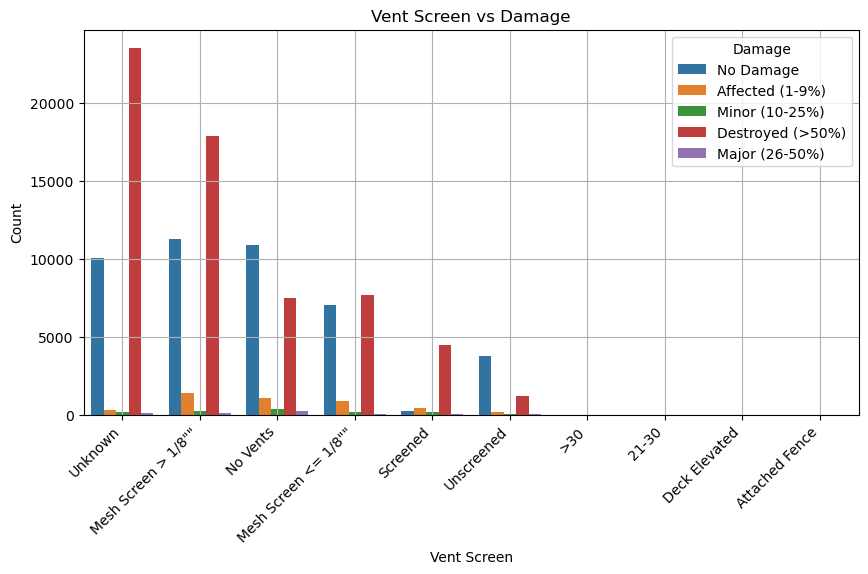

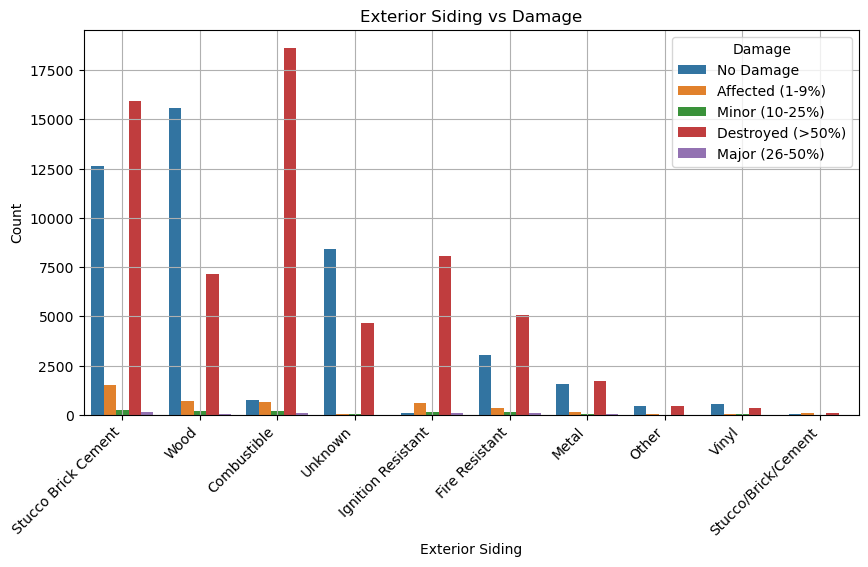

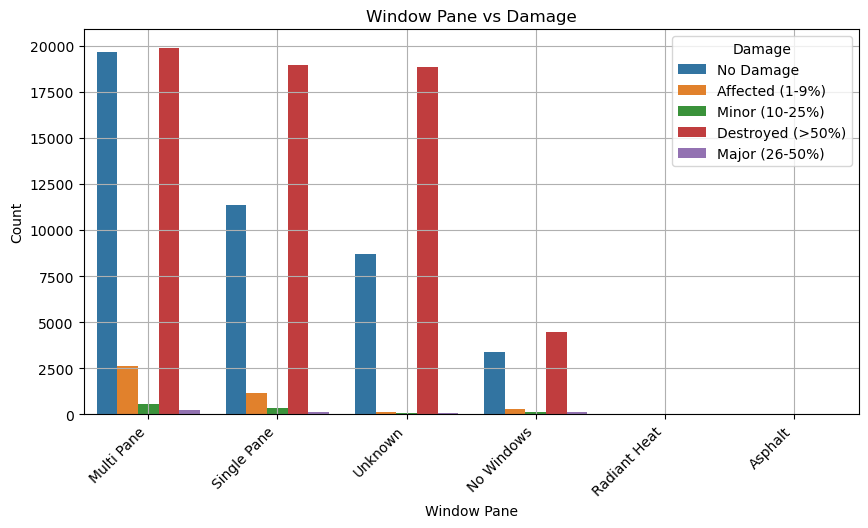

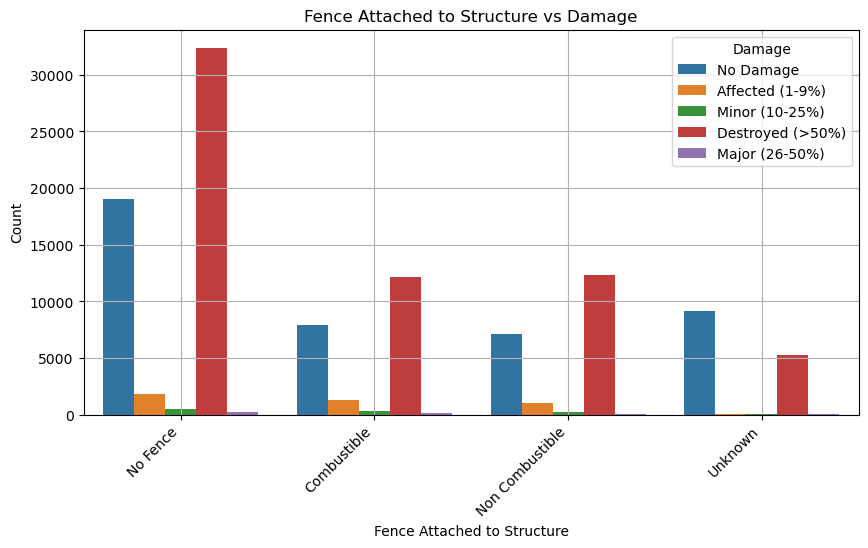

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot relationship between categorical features and "Damage Level"
def plot_categorical_relationship(df, target_col):
    categorical_columns = df.select_dtypes(include=["object", "category"]).columns
    categorical_columns = [col for col in categorical_columns if col != target_col]  # Exclude target variable itself

    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df[col], hue=df[target_col], order=df[col].value_counts().index)
        plt.title(f"{col} vs {target_col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
        plt.legend(title=target_col)
        plt.grid(True)
        plt.show()

# Call the function after loading your dataset
plot_categorical_relationship(df, "Damage")


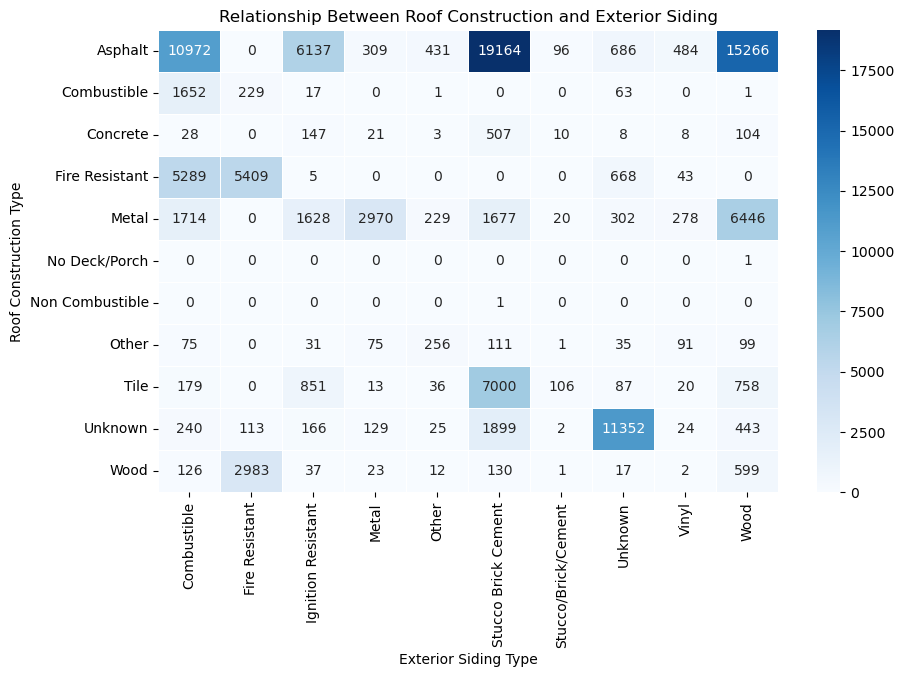

In [35]:
# Heatmap: Relationship Between Roof Construction and Exterior Siding
plt.figure(figsize=(10, 6))
crosstab_roof_siding = pd.crosstab(df['Roof Construction'], df['Exterior Siding'])
sns.heatmap(crosstab_roof_siding, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Relationship Between Roof Construction and Exterior Siding")
plt.xlabel("Exterior Siding Type")
plt.ylabel("Roof Construction Type")
plt.show()


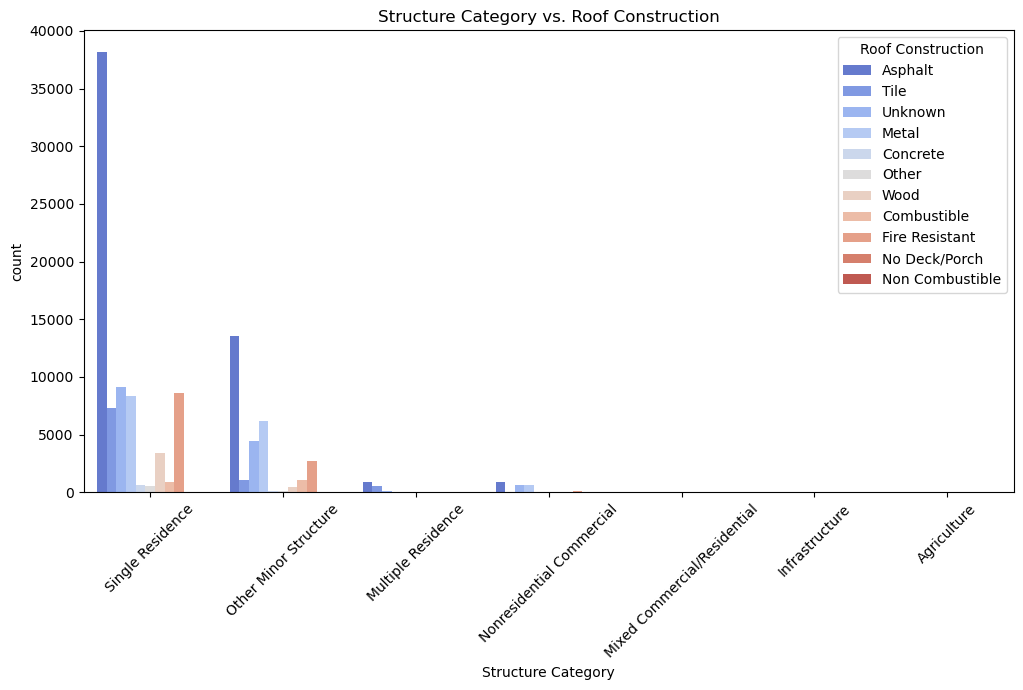

In [36]:
# Count Plot: Structure Category vs. Roof Construction
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Structure Category', hue='Roof Construction', palette="coolwarm")
plt.title("Structure Category vs. Roof Construction")
plt.xticks(rotation=45)
plt.show()

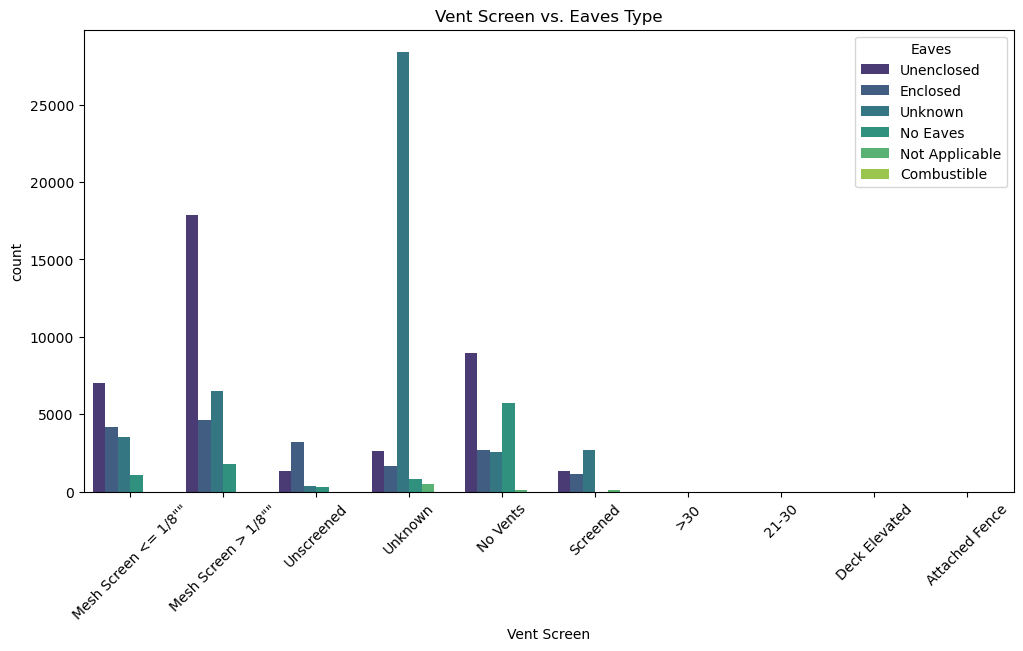

In [37]:
# Count Plot: Vent Screen vs. Eaves Type
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Vent Screen', hue='Eaves', palette="viridis")
plt.title("Vent Screen vs. Eaves Type")
plt.xticks(rotation=45)
plt.show()


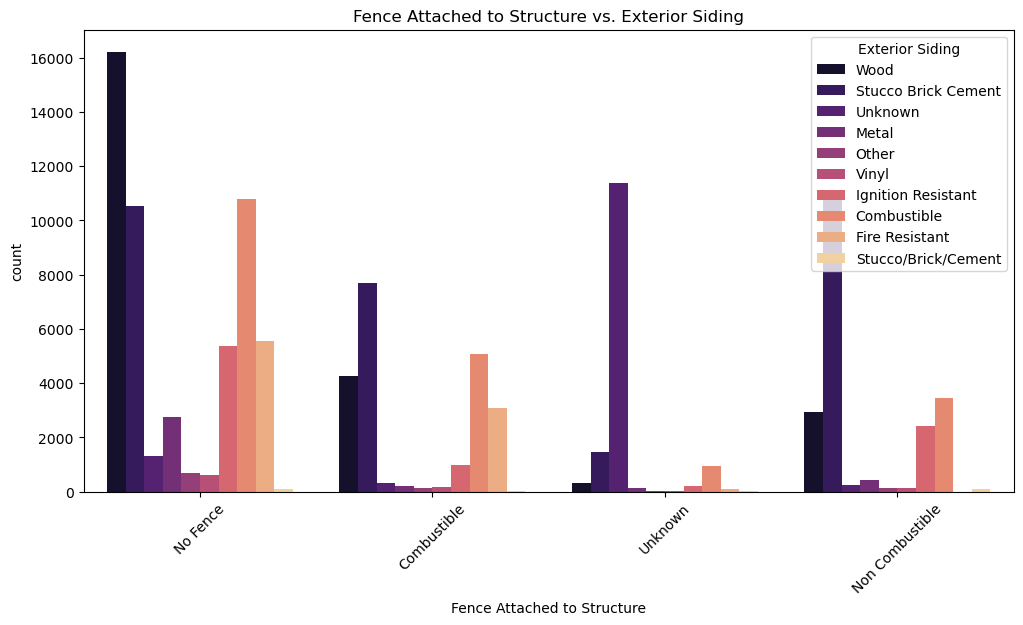

In [38]:
# Count Plot: Fence Attached to Structure vs. Exterior Siding
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Fence Attached to Structure', hue='Exterior Siding', palette="magma")
plt.title("Fence Attached to Structure vs. Exterior Siding")
plt.xticks(rotation=45)
plt.show()


/var/folders/bt/jnhv97x567d_zw77p84pr9v40000gn/T/ipykernel_6571/2550282980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Structure Category', y='Assessed Improved Value (parcel)', palette="coolwarm")


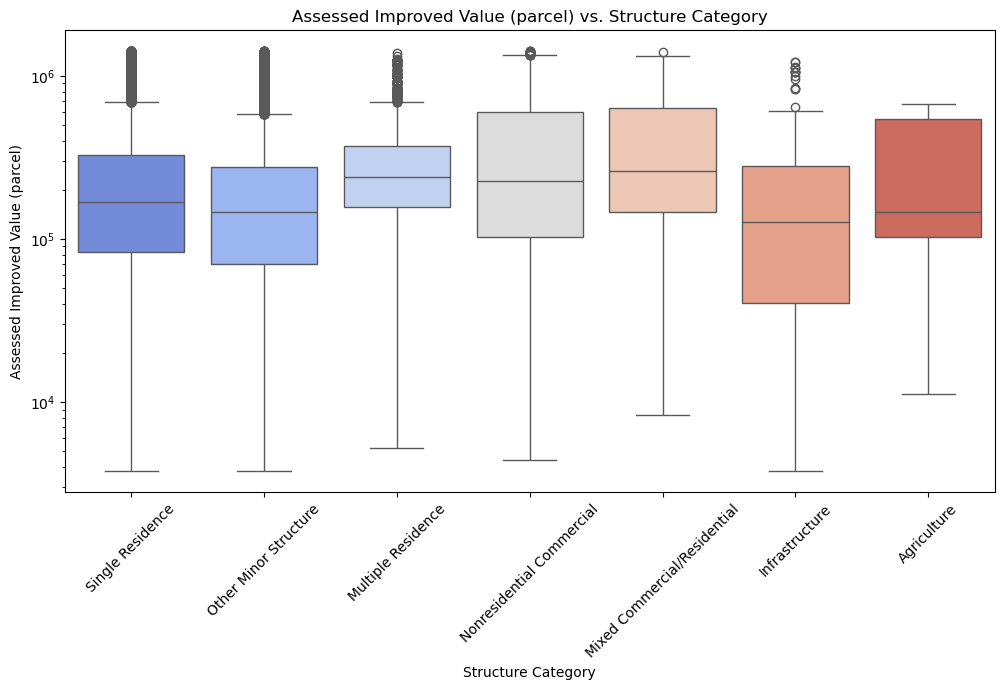

In [39]:
# Box Plot: Assessed Improved Value (parcel) vs. Structure Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Structure Category', y='Assessed Improved Value (parcel)', palette="coolwarm")
plt.title("Assessed Improved Value (parcel) vs. Structure Category")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle skewed values
plt.show()

/var/folders/bt/jnhv97x567d_zw77p84pr9v40000gn/T/ipykernel_6571/3669324954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Roof Construction', y='Assessed Improved Value (parcel)', palette="viridis")


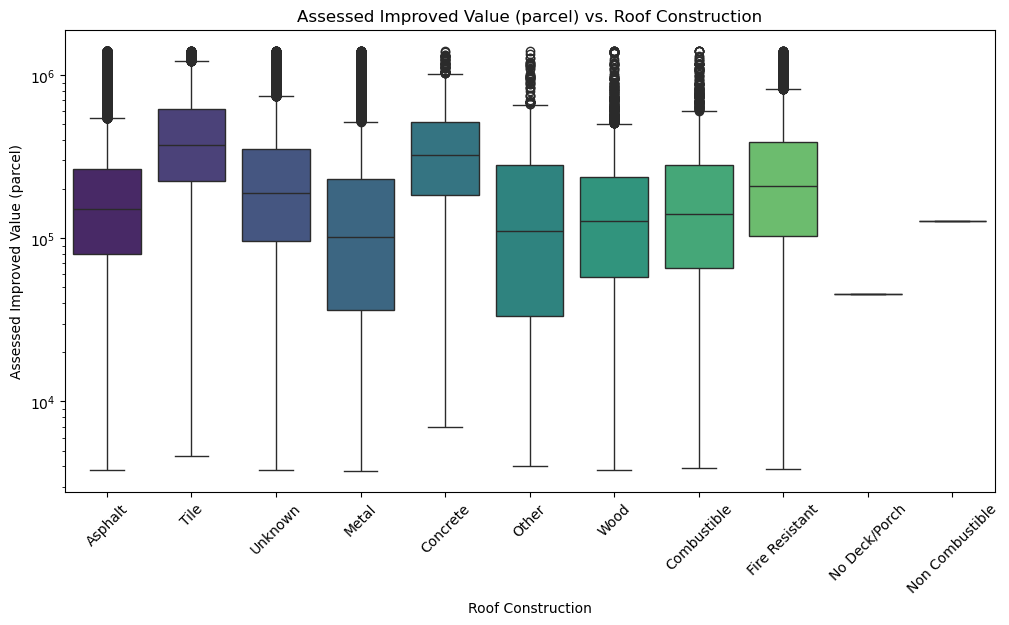

In [40]:
# Box Plot: Assessed Improved Value (parcel) vs. Roof Construction
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Roof Construction', y='Assessed Improved Value (parcel)', palette="viridis")
plt.title("Assessed Improved Value (parcel) vs. Roof Construction")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle skewed values
plt.show()

<Figure size 1200x600 with 0 Axes>

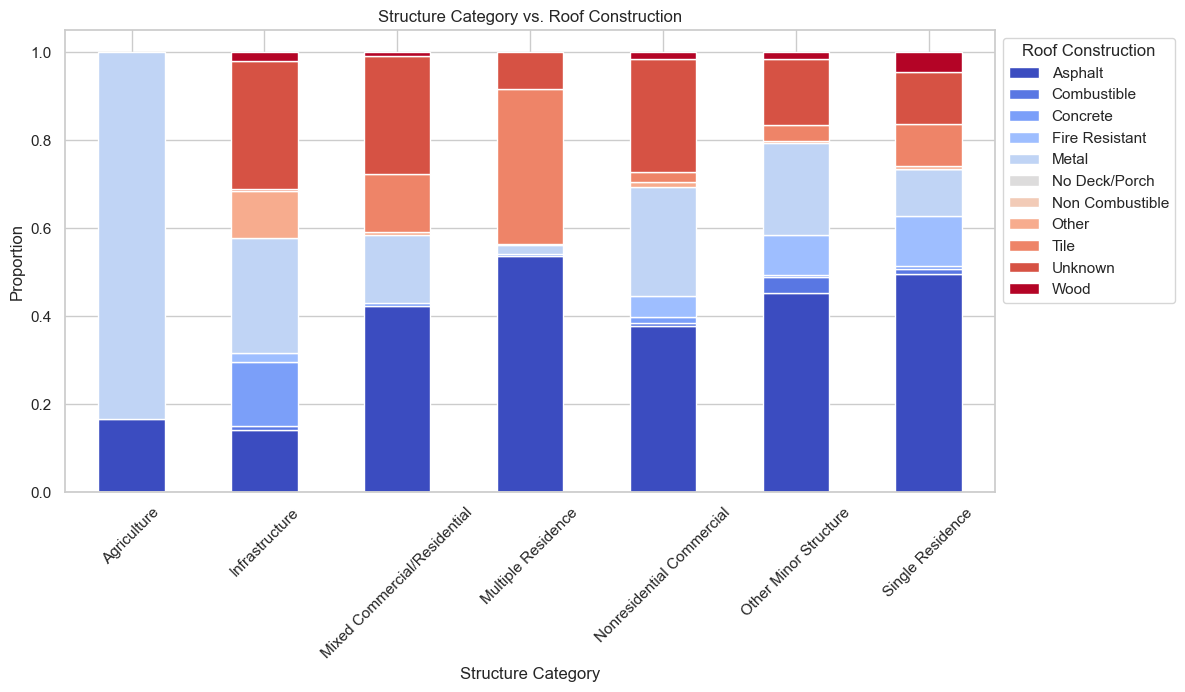

<Figure size 1200x600 with 0 Axes>

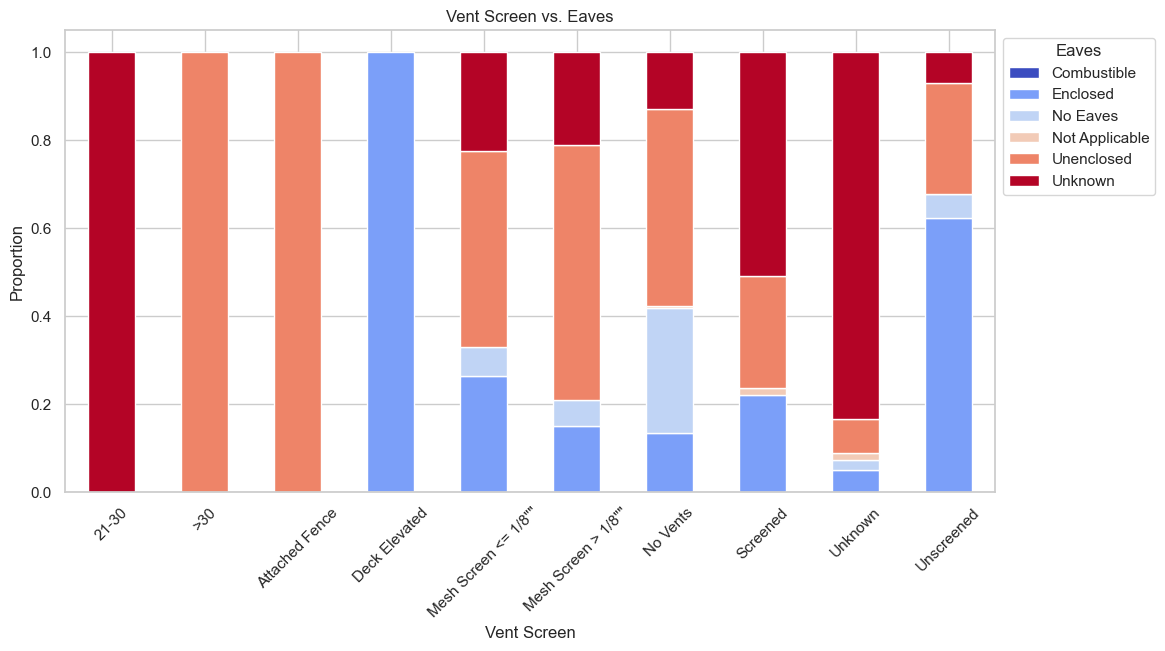

<Figure size 1200x600 with 0 Axes>

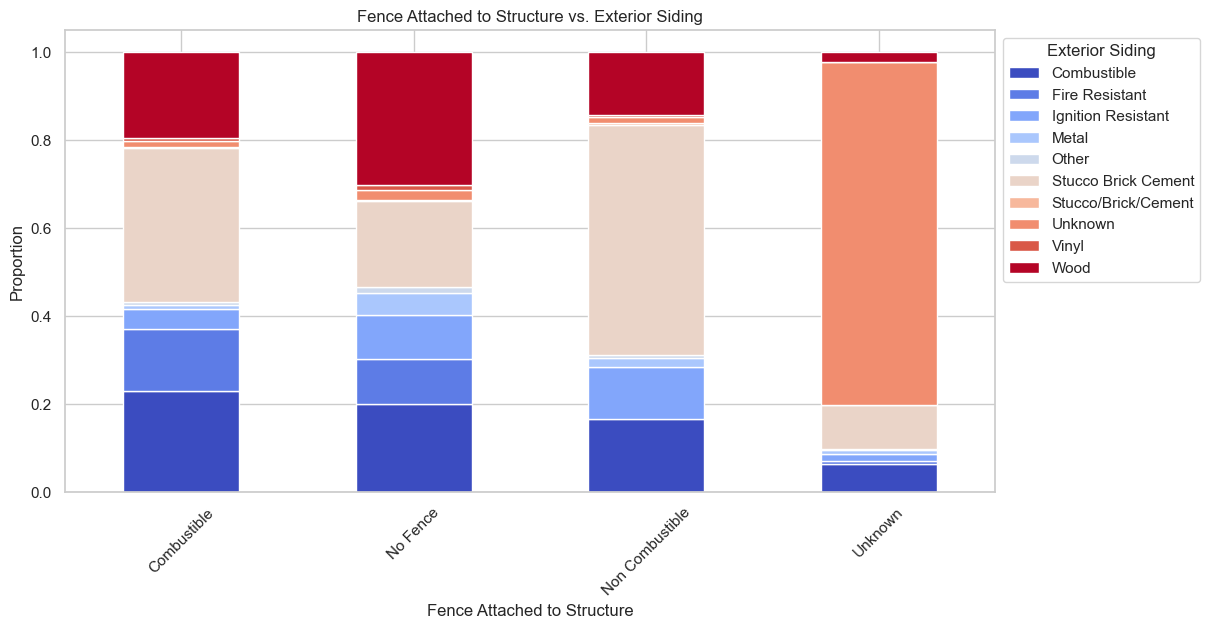

/var/folders/bt/jnhv97x567d_zw77p84pr9v40000gn/T/ipykernel_6571/1856393989.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Structure Category', y='Assessed Improved Value (parcel)', palette="coolwarm")


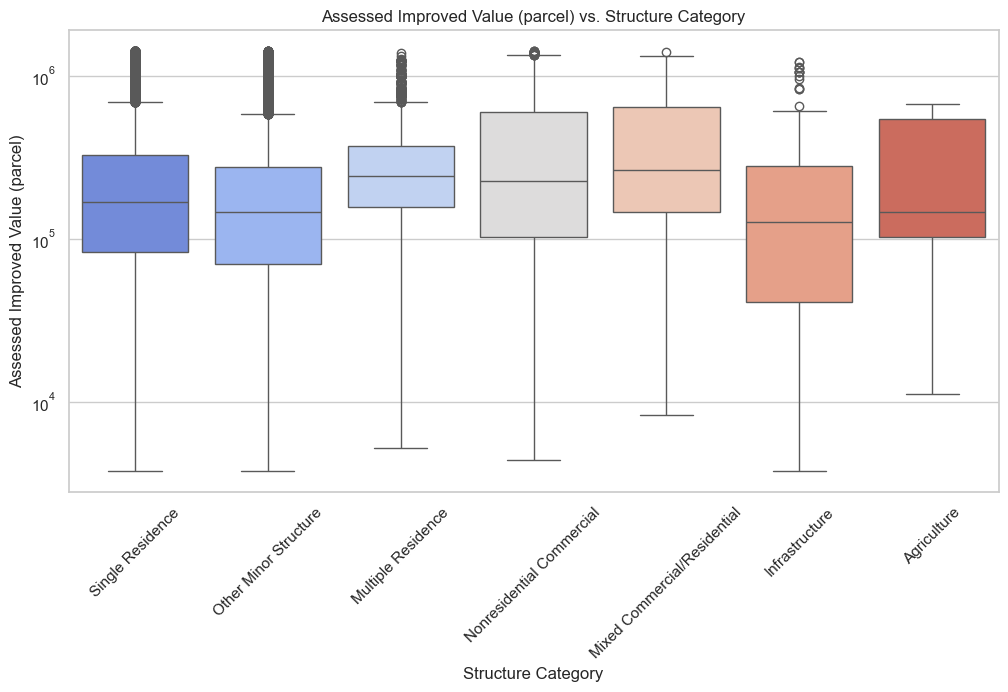

/var/folders/bt/jnhv97x567d_zw77p84pr9v40000gn/T/ipykernel_6571/1856393989.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Roof Construction', y='Assessed Improved Value (parcel)', palette="viridis")


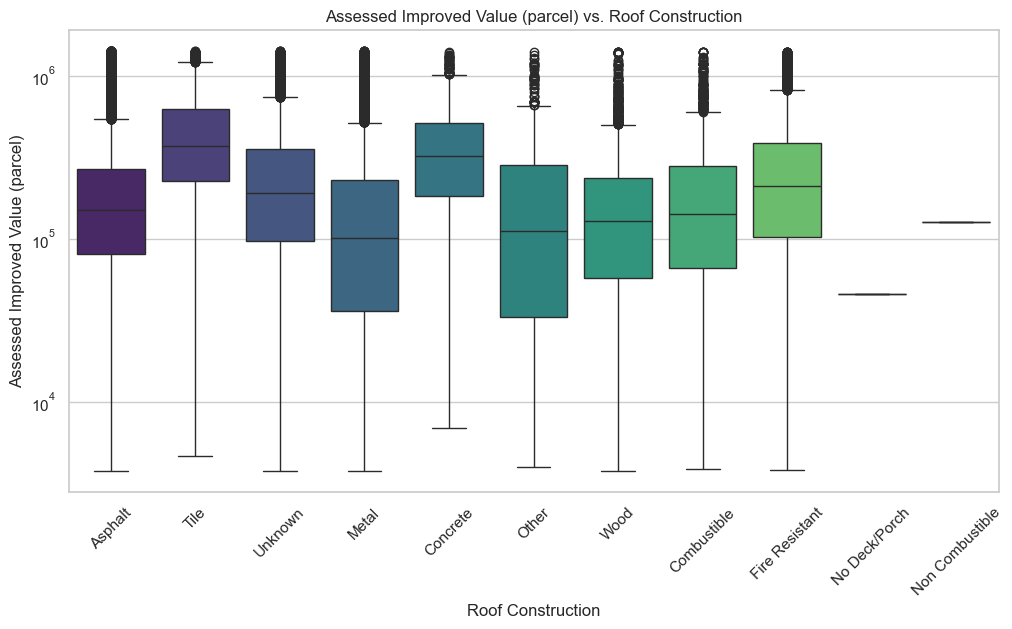

In [41]:
# Set visualization style
sns.set(style="whitegrid")

# Define categorical columns to visualize
categorical_pairs = [
    ('Structure Category', 'Roof Construction'),
    ('Vent Screen', 'Eaves'),
    ('Fence Attached to Structure', 'Exterior Siding')
]

# Create stacked bar charts for each categorical pair
for cat_x, cat_hue in categorical_pairs:
    plt.figure(figsize=(12, 6))
    
    # Group data
    df_grouped = df.groupby([cat_x, cat_hue]).size().reset_index(name='count')

    # Normalize for proportion-based stacked bar chart
    df_grouped['proportion'] = df_grouped.groupby(cat_x)['count'].transform(lambda x: x / x.sum())

    # Pivot for visualization
    df_pivot = df_grouped.pivot(index=cat_x, columns=cat_hue, values='proportion')

    # Plot stacked bar chart
    df_pivot.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(12, 6))

    # Labels and title
    plt.title(f"{cat_x} vs. {cat_hue}")
    plt.xlabel(cat_x)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title=cat_hue, bbox_to_anchor=(1, 1))

    # Show plot
    plt.show()

# Box Plot: Assessed Improved Value (parcel) vs. Structure Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Structure Category', y='Assessed Improved Value (parcel)', palette="coolwarm")
plt.title("Assessed Improved Value (parcel) vs. Structure Category")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle skewed values
plt.show()

# Box Plot: Assessed Improved Value (parcel) vs. Roof Construction
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Roof Construction', y='Assessed Improved Value (parcel)', palette="viridis")
plt.title("Assessed Improved Value (parcel) vs. Roof Construction")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle skewed values
plt.show()


### Interesting Findings

1️. Structure Category vs. Damage Level
- Single Residences and Other Minor Structures are the most common types affected.
- Destroyed (>50%) cases are significantly higher in Other Minor Structures, suggesting they may be more vulnerable.
- Nonresidential Commercial structures also have a noticeable number of "Destroyed" cases, potentially indicating that commercial buildings are not as fire-resistant as expected.

2️. Roof Construction vs. Damage Level
- Asphalt roofs dominate and have the highest number of destroyed structures.
- Destroyed fire-resistant roofs appear to be much larger than other damage levels. 
- Combustible materials show a smaller but significant destruction count, reinforcing that material choice matters.


- Unenclosed eaves seem to have No Damaged cases than other damage levels, but Enclosed eaves show slightly better resilience than Unenclosed.

4️. Vent Screen vs. Damage Level
- No Vents structures have more No Damaged cases, suggesting that vents play a crucial role in fire spread.

5️. Window Pane vs. Damage Level
- Multi-pane windows tend to survive better (higher "No Damage" cases) compared to Single-pane and No Windows.
- Single-pane windows show a significantly higher number of Destroyed (>50%) cases, implying weaker fire resistance.

6. Deck/Porch On Grade vs. Damage Level
- Masonry/Concrete structures have a mix of "No Damage" and Destroyed (>50%) cases.
- Wood decks are more vulnerable, showing a higher proportion of Destroyed (>50%) cases than No Damage.
- No Deck/Porch structures also have significant destruction, meaning porches alone are not the only risk factor.

7. Patio Cover/Carport Attached to Structure vs. Damage Level
- No Patio Cover/Carport structures have a mix of "No Damage" and Destroyed (>50%) cases.
- Combustible materials used in patio covers/carports correlate with higher destruction rates.
- Non-combustible materials appear to offer better protection.

8. Fence Attached to Structure vs. Damage Level
- ⁠No Fence structures have both the highest number of No Damage and Destroyed cases, implying mixed fire effects.
- ⁠Non-combustible fences show a higher proportion of damage.

9. Exterior Siding vs. Damage
- Wood sidings have larger No Damage cases than Destroyed.
- Combustible sidings have a significantly larger Destroyed cases than other damage levels.
- Ignition resistant sidings have a significantly larger Destroyed cases than other damage levels.
- Destroyed is much larger than other damage levels for fire-resistant exterior sidings.


## After cleaning the data, this is the final dataframe:

In [42]:
df

,Damage,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Assessed Improved Value (parcel)
0,No Damage,Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Single Pane,No Fence,510000.0
1,Affected (1-9%),Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Combustible,573052.0
2,No Damage,Single Residence,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,350151.0
3,No Damage,Single Residence,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,134880.0
4,No Damage,Single Residence,Tile,Enclosed,"Mesh Screen > 1/8""""",Wood,Multi Pane,No Fence,346648.0
...,...,...,...,...,...,...,...,...,...
130717,Destroyed (>50%),Single Residence,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Stucco Brick Cement,Single Pane,Combustible,143091.0
130718,Destroyed (>50%),Other Minor Structure,Asphalt,Unenclosed,Unknown,Stucco Brick Cement,No Windows,Non Combustible,143091.0
130719,Destroyed (>50%),Single Residence,Metal,Unknown,"Mesh Screen > 1/8""""",Stucco Brick Cement,Single Pane,Unknown,647421.0
130720,Destroyed (>50%),Other Minor Structure,Asphalt,Unknown,Unknown,Stucco Brick Cement,Multi Pane,Combustible,647421.0


In [43]:
df.to_csv('final_data', index=None)
df_cleaned = pd.read_csv('final_data')
df_cleaned.head()

,Damage,Structure Category,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Fence Attached to Structure,Assessed Improved Value (parcel)
0,No Damage,Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Single Pane,No Fence,510000.0
1,Affected (1-9%),Single Residence,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Combustible,573052.0
2,No Damage,Single Residence,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,350151.0
3,No Damage,Single Residence,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Fence,134880.0
4,No Damage,Single Residence,Tile,Enclosed,"Mesh Screen > 1/8""""",Wood,Multi Pane,No Fence,346648.0


## Baseline

## Logistic Regression

In [44]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


from sklearn.impute import SimpleImputer

df = pd.read_csv('final_data')
# Apply median imputation
imputer = SimpleImputer(strategy="median")
df["Assessed Improved Value (parcel)"] = imputer.fit_transform(df[["Assessed Improved Value (parcel)"]])

# Define the target variable
target = "Damage"  # Assuming 'Damage' is the target column
features = [col for col in df.columns if col != target]

# Encode the target variable (Damage) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Damage"] = le.fit_transform(df["Damage"])  # Convert categories to numerical labels

# Define X and y
X = df.drop(columns=["Damage"])  # Drop target column from features
y = df["Damage"]  # Encoded target variable

# Identify non-numeric features
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver="saga", random_state=42)  # Use "saga" for large datasets
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Calculate evaluation metrics
acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average="weighted")

# Create a results DataFrame
results_df_log = pd.DataFrame({
    "Model": ["Logistic Regression"],
    "Accuracy": [acc_log],
    "F1-score": [f1_log]
})


In [45]:
results_df_log

,Model,Accuracy,F1-score
0,Logistic Regression,0.839083,0.818776


## Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_baseline = RandomForestClassifier(random_state=42)  # No hyperparameter tuning

# Train the model
rf_clf_baseline.fit(X_train, y_train)
y_pred_rf_baseline = rf_clf_baseline.predict(X_test)

# Calculate evaluation metrics
acc_rf_baseline = accuracy_score(y_test, y_pred_rf_baseline)
f1_rf_baseline = f1_score(y_test, y_pred_rf_baseline, average="weighted")

# Create a results DataFrame
results_df_rf = pd.DataFrame({
    "Model": ["Random Forest Classifier"],
    "Accuracy": [acc_rf_baseline],
    "F1-score": [f1_rf_baseline]
})
results_df_rf

,Model,Accuracy,F1-score
0,Random Forest Classifier,0.806386,0.803298


## XGBOOST

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Define the target variable
df = pd.read_csv('final_data')
target = "Damage"  # Assuming 'Damage' is the target column
features = [col for col in df.columns if col != target]

# Encode the target variable (Damage) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Damage"] = le.fit_transform(df["Damage"])  # Convert categories to numerical labels

# Define X and y
X = df.drop(columns=["Damage"])  # Drop target column from features
y = df["Damage"]  # Encoded target variable

# Identify non-numeric features
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Calculate evaluation metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average="weighted")

# Create a results DataFrame
results_df_xgb = pd.DataFrame({
    "Model": ["XGBoost Classifier"],
    "Accuracy": [acc_xgb],
    "F1-score": [f1_xgb]
})

results_df_xgb


/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:03:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,F1-score
0,XGBoost Classifier,0.850731,0.831744


## LightGBM

In [48]:
# Define the target variable
df = pd.read_csv('final_data')
target = "Damage"  # Assuming 'Damage' is the target column
features = [col for col in df.columns if col != target]

# Encode the target variable (Damage) using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Damage"] = le.fit_transform(df["Damage"])  # Convert categories to numerical labels

# Define X and y
X = df.drop(columns=["Damage"])  # Drop target column from features
y = df["Damage"]  # Encoded target variable

# Identify non-numeric features
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to categorical features
X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Re-split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Import necessary library for LightGBM
from lightgbm import LGBMClassifier

# Train and evaluate LightGBM Classifier with default parameters
lgbm_clf = LGBMClassifier(random_state=42)

# Train the model
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)

# Calculate evaluation metrics
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, average="weighted")

# Create a results DataFrame
results_df_lgbm = pd.DataFrame({
    "Model": ["LightGBM Classifier"],
    "Accuracy": [acc_lgbm],
    "F1-score": [f1_lgbm]
})

results_df_lgbm


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 88936, number of used features: 42
[LightGBM] [Info] Start training from score -3.270041
[LightGBM] [Info] Start training from score -0.580967
[LightGBM] [Info] Start training from score -5.350667
[LightGBM] [Info] Start training from score -4.621448
[LightGBM] [Info] Start training from score -0.946610


,Model,Accuracy,F1-score
0,LightGBM Classifier,0.849651,0.830065


In [81]:
import pandas as pd

df_combined = pd.concat([results_df_log, results_df_rf, results_df_lgbm, results_df_xgb], axis=0, ignore_index=True)


In [82]:
df_combined

,Model,Accuracy,F1-score
0,Logistic Regression,0.839083,0.818776
1,Random Forest Classifier,0.806386,0.803298
2,LightGBM Classifier,0.849651,0.830065
3,XGBoost Classifier,0.850731,0.831744


## Model

## Logistic regression

In [107]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

df2 = pd.read_csv('final_data')

# Define the target variable
target = "Damage"
features = [col for col in df2.columns if col != target]

# Encode the target variable (Damage) using Label Encoding
le = LabelEncoder()
df2["Damage"] = le.fit_transform(df2["Damage"])

# Define X and y
X = df2.drop(columns=["Damage"])
y = df2["Damage"]

# Identify numerical and categorical features
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()  # Convert to list if needed

# Create a new feature "Assessed_Value_Category" by binning "Assessed Improved Value (parcel)"
#X["Assessed_Value_Category"] = pd.qcut(X["Assessed Improved Value (parcel)"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Ensure this new feature is treated as categorical
#categorical_cols.append("Assessed_Value_Category")

# Preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Define hyperparameter grid for Logistic Regression tuning
param_grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga']
}

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Function to perform GridSearchCV and evaluate Logistic Regression
def tune_logistic_regression():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=500, random_state=42))])
    
    grid_search = GridSearchCV(pipeline, param_grid_logreg, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    return {"Model": "Optimized Logistic Regression", "Accuracy": acc, "F1-score": f1, "Best Params": grid_search.best_params_}

# Tune and evaluate Logistic Regression
results_logreg_optimized = tune_logistic_regression()

# Create a DataFrame to store results
results_df_logreg_optimized = pd.DataFrame([results_logreg_optimized])
results_df_logreg_optimized

/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kat

,Model,Accuracy,F1-score,Best Params
0,Optimized Logistic Regression,0.839038,0.818731,"{'classifier__C': 10, 'classifier__penalty': '..."


In [108]:
results_df_logreg_optimized.loc[0, "Best Params"]


{'classifier__C': 10,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

## XGBOOST

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import joblib

# --- Data Preparation ---
df = pd.read_csv('final_data')
target = "Damage"

# Encode the target variable using LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical features
# (You can adjust these lists if needed)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Model Pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# --- Expanded Hyperparameter Tuning ---
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [7],
    'classifier__learning_rate': [0.2],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0.2],
    'classifier__min_child_weight': [1, 3, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1  # Enable progress logging
)

grid_search.fit(X_train, y_train)

# Best model from grid search
best_pipeline = grid_search.best_estimator_

# --- Model Evaluation ---
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

results_df_xgboost_tuned = pd.DataFrame({
    "Model": ["XGBoost Classifier (Tuned)"],
    "Accuracy": [acc],
    "F1-score": [f1],
    "Best Params": [grid_search.best_params_]
})

(results_df_xgboost_tuned)

In [88]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import joblib

# --- Data Preparation ---
df = pd.read_csv('final_data')
target = "Damage"

# Encode the target variable using LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical features
# (You can adjust these lists if needed)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Model Pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# --- Expanded Hyperparameter Tuning ---
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [7],
    'classifier__learning_rate': [0.2],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0.2],
    'classifier__min_child_weight': [1, 3, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1  # Enable progress logging
)

grid_search.fit(X_train, y_train)

# Best model from grid search
best_pipeline = grid_search.best_estimator_

# --- Model Evaluation ---
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

results_df_xgboost_tuned = pd.DataFrame({
    "Model": ["XGBoost Classifier (Tuned)"],
    "Accuracy": [acc],
    "F1-score": [f1],
    "Best Params": [grid_search.best_params_]
})

(results_df_xgboost_tuned)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:05:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:05:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:05:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:05:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


,Model,Accuracy,F1-score,Best Params
0,XGBoost Classifier (Tuned),0.851136,0.833018,"{'classifier__colsample_bytree': 0.8, 'classif..."


## LIGHTGBM

In [55]:
# Import necessary library for LightGBM
from lightgbm import LGBMClassifier

df = pd.read_csv('final_data')
target = "Damage"
# Encode the target variable
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        # Removed drop='first' to keep all categories. Adjust if needed.
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Model Pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Define hyperparameter grid for LightGBM tuning
param_grid_lgbm = {
    'classifier__n_estimators': [100, 200],  # Number of boosting rounds
    'classifier__max_depth': [3, 6, 9],  # Depth of each tree
    'classifier__learning_rate': [0.3, 0.5],  # Step size shrinkage
    'classifier__reg_alpha': [0.1],  # L1 Regularization
    'classifier__reg_lambda': [1.0]  # L2 Regularization
}

# Function to perform GridSearchCV and evaluate LightGBM
def tune_lightgbm():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LGBMClassifier(random_state=42))])
    
    grid_search = GridSearchCV(pipeline, param_grid_lgbm, cv=StratifiedKFold(n_splits=5), scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(grid_search.best_params_)
    return {"Model": "Optimized LightGBM", "Accuracy": acc, "F1-score": f1, "Best Params": grid_search.best_params_}

# Tune and evaluate LightGBM
results_lgbm_optimized = tune_lightgbm()

# Create a DataFrame to store results
results_df_lgbm_optimized = pd.DataFrame([results_lgbm_optimized])


results_df_lgbm_optimized

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 71149, number of used features: 45
[LightGBM] [Info] Number of data points in the train set: 71148, number of used features: 45
[LightGBM] [Info] Start training from score -3.270044
[LightGBM] [Info] Start training from score -0.580960
[LightGBM] [Info] Start training from score -5.349486
[LightGBM] [Info] Start training from score -4.621451
[LightGBM] [Info] Start training from score -3.270030
[LightGBM] [Info] Start tr

,Model,Accuracy,F1-score,Best Params
0,Optimized LightGBM,0.850641,0.832199,"{'classifier__learning_rate': 0.3, 'classifier..."


## Final tuned dataframe

In [109]:
df_tuned = pd.concat([results_df_logreg_optimized, results_df_lgbm_optimized, results_df_xgboost_tuned], axis=0, ignore_index=True)
df_tuned

,Model,Accuracy,F1-score,Best Params
0,Optimized Logistic Regression,0.839038,0.818731,"{'classifier__C': 10, 'classifier__penalty': '..."
1,Optimized LightGBM,0.850641,0.832199,"{'classifier__learning_rate': 0.3, 'classifier..."
2,XGBoost Classifier (Tuned),0.851136,0.833018,"{'classifier__colsample_bytree': 0.8, 'classif..."


## STREAMLIT

We chose xgboost for the final model

In [57]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
import joblib

# --- Data Preparation ---
df = pd.read_csv('final_data')
target = "Damage"

# Encode the target variable using LabelEncoder
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Identify numeric and categorical features
# (You can adjust these lists if needed)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Model Pipeline ---
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# --- Expanded Hyperparameter Tuning ---
param_grid = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [7],
    'classifier__learning_rate': [0.2],
    'classifier__subsample': [0.8],
    'classifier__colsample_bytree': [0.8],
    'classifier__gamma': [0.2],
    'classifier__min_child_weight': [1, 3, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1  # Enable progress logging
)

grid_search.fit(X_train, y_train)

# Best model from grid search
best_pipeline = grid_search.best_estimator_

# --- Model Evaluation ---
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

results_df_xgboost_tuned = pd.DataFrame({
    "Model": ["XGBoost Classifier (Tuned)"],
    "Accuracy": [acc],
    "F1-score": [f1]
})

print("Best Parameters:", grid_search.best_params_)
print(results_df_xgboost_tuned)

# --- Save the Artifacts ---
joblib.dump(best_pipeline, "xgb_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")
joblib.dump(le, "label_encoder.pkl")

print("✅ Saved best_pipeline as xgb_model.pkl, preprocessor as preprocessor.pkl, and label encoder as label_encoder.pkl")


Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/katy/miniforge3/envs/dsc80/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:09:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


Best Parameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.2, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
                        Model  Accuracy  F1-score
0  XGBoost Classifier (Tuned)  0.851136  0.833018
✅ Saved best_pipeline as xgb_model.pkl, preprocessor as preprocessor.pkl, and label encoder as label_encoder.pkl


In [58]:
print(dict(zip(le.classes_, le.transform(le.classes_))))


{'Affected (1-9%)': np.int64(0), 'Destroyed (>50%)': np.int64(1), 'Major (26-50%)': np.int64(2), 'Minor (10-25%)': np.int64(3), 'No Damage': np.int64(4)}


In [59]:
{'Affected (1-9%)': np.int64(0), 'Destroyed (>50%)': np.int64(1), 'Major (26-50%)': np.int64(2), 'Minor (10-25%)': np.int64(3), 'No Damage': np.int64(4)}


{'Affected (1-9%)': np.int64(0),
 'Destroyed (>50%)': np.int64(1),
 'Major (26-50%)': np.int64(2),
 'Minor (10-25%)': np.int64(3),
 'No Damage': np.int64(4)}

In [110]:
df_combined

,Model,Accuracy,F1-score
0,Logistic Regression,0.839083,0.818776
1,Random Forest Classifier,0.806386,0.803298
2,LightGBM Classifier,0.849651,0.830065
3,XGBoost Classifier,0.850731,0.831744


In [111]:
df_tuned

,Model,Accuracy,F1-score,Best Params
0,Optimized Logistic Regression,0.839038,0.818731,"{'classifier__C': 10, 'classifier__penalty': '..."
1,Optimized LightGBM,0.850641,0.832199,"{'classifier__learning_rate': 0.3, 'classifier..."
2,XGBoost Classifier (Tuned),0.851136,0.833018,"{'classifier__colsample_bytree': 0.8, 'classif..."


In [104]:
0.833018-0.831744

0.0012739999999999974

In [112]:
df_tuned.loc[0, "Best Params"]


{'classifier__C': 10,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [99]:
df_tuned.loc[1, "Best Params"]

{'classifier__learning_rate': 0.3,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 100,
 'classifier__reg_alpha': 0.1,
 'classifier__reg_lambda': 1.0}

In [100]:
df_tuned.loc[2, "Best Params"]

{'classifier__colsample_bytree': 0.8,
 'classifier__gamma': 0.2,
 'classifier__learning_rate': 0.2,
 'classifier__max_depth': 7,
 'classifier__min_child_weight': 1,
 'classifier__n_estimators': 200,
 'classifier__subsample': 0.8}

In [65]:
import pandas as pd
df = pd.read_csv('final_data')
df['Assessed Improved Value (parcel)'].min()

np.float64(3767.0)

In [66]:
df['Assessed Improved Value (parcel)'].max()

np.float64(1412010.0)

In [113]:
df.columns

Index(['Damage', 'Structure Category', 'Roof Construction', 'Eaves',
       'Vent Screen', 'Exterior Siding', 'Window Pane',
       'Fence Attached to Structure', 'Assessed Improved Value (parcel)'],
      dtype='object')

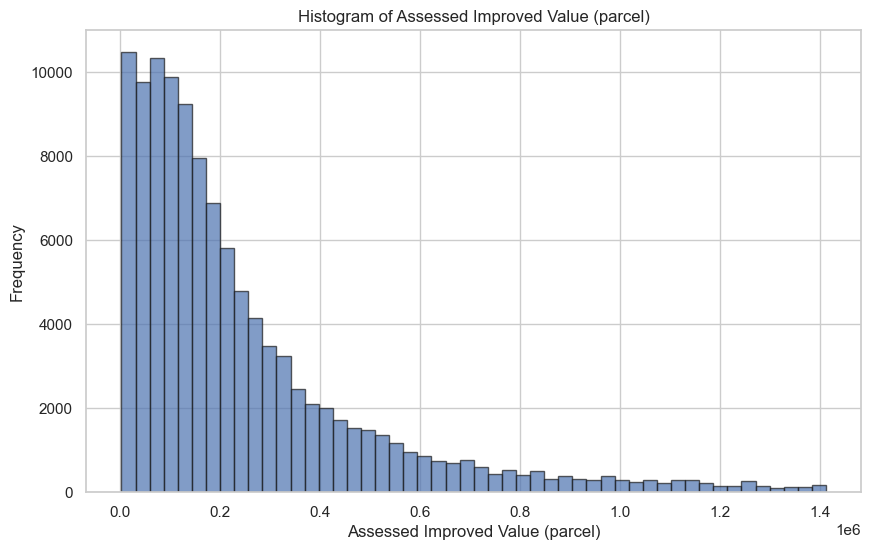

In [67]:
import matplotlib.pyplot as plt

# Plot histogram with 30 bins (adjust bins as needed)
plt.figure(figsize=(10, 6))
plt.hist(df['Assessed Improved Value (parcel)'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Assessed Improved Value (parcel)')
plt.ylabel('Frequency')
plt.title('Histogram of Assessed Improved Value (parcel)')
plt.show()


In [117]:
df = pd.read_csv('final_data')
df['Damage'].unique()

array(['No Damage', 'Affected (1-9%)', 'Minor (10-25%)',
       'Destroyed (>50%)', 'Major (26-50%)'], dtype=object)